# Basics with images

_

## Environment and data

_

In [1]:
# Standard library imports
# Standard library imports
import random

# Related third party imports
import numpy as np

# Local application/library specific imports
import nnlibs.initialize
from nnlibs.commons.maths import relu, softmax
from nnlibs.commons.library import (
    configure_directory,
    read_model,
)
from nnlibs.network.models import EpyNN

from nnlibs.embedding.models import Embedding
from nnlibs.convolution.models import Convolution
from nnlibs.pooling.models import Pooling
from nnlibs.flatten.models import Flatten
from nnlibs.dropout.models import Dropout
from nnlibs.dense.models import Dense
from prepare_dataset import prepare_dataset
from settings import se_hPars


########################## CONFIGURE ##########################
random.seed(1)
np.random.seed(1)

np.set_printoptions(threshold=10)

np.seterr(all='warn')

configure_directory()


############################ DATASET ##########################
X_features, Y_label = prepare_dataset(N_SAMPLES=7500)

_

## Feed-Forward (FF)

_

### Embedding

_

In [2]:
embedding = Embedding(X_data=X_features,
                      Y_data=Y_label,
                      X_scale=True,
                      Y_encode=True,
                      batch_size=32,
                      relative_size=(2, 1, 0))

_

### Flatten-Dense

_

In [3]:
name = 'Flatten_Dense-2-softmax'

se_hPars['learning_rate'] = 0.01

flatten = Flatten()

dense = Dense(2, softmax)

layers = [embedding, flatten, dense]

model = EpyNN(layers=layers, name=name)

_

In [4]:
model.initialize(loss='MSE', seed=1, se_hPars=se_hPars.copy())

--- EpyNN Check --- 
Layer: Embedding
compute_shapes: Embedding
initialize_parameters: Embedding
forward: Embedding
Layer: Flatten
compute_shapes: Flatten
initialize_parameters: Flatten
forward: Flatten
Layer: Dense
compute_shapes: Dense
initialize_parameters: Dense
forward: Dense
Layer: Dense
backward: Dense
compute_gradients: Dense
Layer: Flatten
backward: Flatten
compute_gradients: Flatten
Layer: Embedding
backward: Embedding
compute_gradients: Embedding


_

In [5]:
model.train(epochs=100, init_logs=False)

+-------+----------+-------+----------+-------+-------+------------------------------------+
| epoch |  lrate   |       | accuracy |       |  MSE  |             Experiment             |
|       |  Dense   |  (0)  |   (1)    |  (0)  |  (1)  |                                    |
+-------+----------+-------+----------+-------+-------+------------------------------------+
|   0   | 1.00e-02 | 0.504 |  0.496   | 0.393 | 0.398 | 1628624032_Flatten_Dense-2-softmax |
|  10   | 1.00e-02 | 0.583 |  0.537   | 0.264 | 0.285 | 1628624032_Flatten_Dense-2-softmax |
|  20   | 1.00e-02 | 0.667 |  0.644   | 0.198 | 0.207 | 1628624032_Flatten_Dense-2-softmax |
|  30   | 1.00e-02 | 0.726 |  0.698   | 0.180 | 0.189 | 1628624032_Flatten_Dense-2-softmax |
|  40   | 1.00e-02 | 0.749 |  0.729   | 0.170 | 0.178 | 1628624032_Flatten_Dense-2-softmax |
|  50   | 1.00e-02 | 0.764 |  0.744   | 0.163 | 0.172 | 1628624032_Flatten_Dense-2-softmax |
|  60   | 1.00e-02 | 0.776 |  0.748   | 0.158 | 0.167 | 1628624032_Fla

_

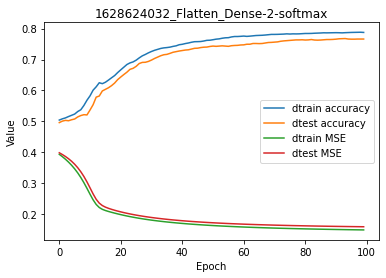

In [6]:
model.plot(path=False)

_

### Multi-layers with Dropout

_

In [7]:
name = 'Flatten_Dropout-08_Dense-64-relu_Dropout-07_Dense-2-softmax'

se_hPars['learning_rate'] = 0.005

flatten = Flatten()

dropout1 = Dropout(keep_prob=0.8)

hidden_dense = Dense(64, relu)

dropout2 = Dropout(keep_prob=0.7)

dense = Dense(2, softmax)

layers = [embedding, flatten, dropout1, hidden_dense, dropout2, dense]

model = EpyNN(layers=layers, name=name)

_

In [8]:
model.initialize(loss='MSE', seed=1, se_hPars=se_hPars.copy())

--- EpyNN Check --- 
Layer: Embedding
compute_shapes: Embedding
initialize_parameters: Embedding
forward: Embedding
Layer: Flatten
compute_shapes: Flatten
initialize_parameters: Flatten
forward: Flatten
Layer: Dropout
compute_shapes: Dropout
initialize_parameters: Dropout
forward: Dropout
Layer: Dense
compute_shapes: Dense
initialize_parameters: Dense
forward: Dense
Layer: Dropout
compute_shapes: Dropout
initialize_parameters: Dropout
forward: Dropout
Layer: Dense
compute_shapes: Dense
initialize_parameters: Dense
forward: Dense
Layer: Dense
backward: Dense
compute_gradients: Dense
Layer: Dropout
backward: Dropout
compute_gradients: Dropout
Layer: Dense
backward: Dense
compute_gradients: Dense
Layer: Dropout
backward: Dropout
compute_gradients: Dropout
Layer: Flatten
backward: Flatten
compute_gradients: Flatten
Layer: Embedding
backward: Embedding
compute_gradients: Embedding


_

In [9]:
model.train(epochs=100, init_logs=False)

+-------+----------+----------+-------+----------+-------+-------+------------------------------------------------------------------------+
| epoch |  lrate   |  lrate   |       | accuracy |       |  MSE  |                               Experiment                               |
|       |  Dense   |  Dense   |  (0)  |   (1)    |  (0)  |  (1)  |                                                                        |
+-------+----------+----------+-------+----------+-------+-------+------------------------------------------------------------------------+
|   0   | 5.00e-03 | 5.00e-03 | 0.512 |  0.503   | 0.286 | 0.291 | 1628624037_Flatten_Dropout-08_Dense-64-relu_Dropout-07_Dense-2-softmax |
|  10   | 5.00e-03 | 5.00e-03 | 0.596 |  0.580   | 0.237 | 0.241 | 1628624037_Flatten_Dropout-08_Dense-64-relu_Dropout-07_Dense-2-softmax |
|  20   | 5.00e-03 | 5.00e-03 | 0.628 |  0.603   | 0.226 | 0.234 | 1628624037_Flatten_Dropout-08_Dense-64-relu_Dropout-07_Dense-2-softmax |
|  30   | 5.00e-03 |

_

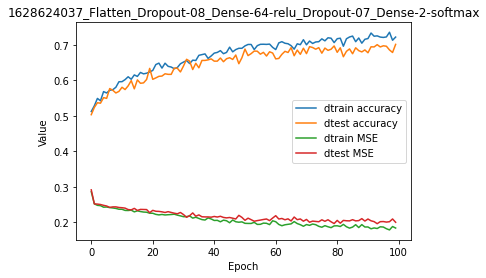

In [10]:
model.plot(path=False)

_

## Convolutional Neural Network (CNN)

_

In [11]:
embedding = Embedding(X_data=X_features,
                      Y_data=Y_label,
                      X_scale=True,
                      Y_encode=True,
                      batch_size=500,
                      relative_size=(2, 1, 0))

_

In [12]:
name = 'Convolution-32-2_Pooling-3-3-Max_Flatten_Dense-2-softmax'

se_hPars['learning_rate'] = 0.005
se_hPars['softmax_temperature'] = 5

convolution = Convolution(n_filters=2, f_width=5, activate=relu)

pooling = Pooling(pool_size=(5, 5), stride=5)

flatten = Flatten()

# hidden_dense = Dense(128, relu)
dense = Dense(2, softmax)

layers = [embedding, convolution, pooling, flatten, dense]
# layers = [embedding, convolution, pooling, flatten, hidden_dense, dense]

model = EpyNN(layers=layers, name=name)

_

In [13]:
model.initialize(loss='CCE', seed=1, se_hPars=se_hPars.copy())

--- EpyNN Check --- 
Layer: Embedding
compute_shapes: Embedding
initialize_parameters: Embedding
forward: Embedding
Layer: Convolution
compute_shapes: Convolution
initialize_parameters: Convolution
forward: Convolution
Layer: Pooling
compute_shapes: Pooling
initialize_parameters: Pooling
forward: Pooling
Layer: Flatten
compute_shapes: Flatten
initialize_parameters: Flatten
forward: Flatten
Layer: Dense
compute_shapes: Dense
initialize_parameters: Dense
forward: Dense
Layer: Dense
backward: Dense
compute_gradients: Dense
Layer: Flatten
backward: Flatten
compute_gradients: Flatten
Layer: Pooling
backward: Pooling
compute_gradients: Pooling
Layer: Convolution
backward: Convolution
compute_gradients: Convolution
Layer: Embedding
backward: Embedding
compute_gradients: Embedding


_

In [14]:
model.train(epochs=100, init_logs=False)

+-------+-------------+----------+-------+----------+-------+-------+---------------------------------------------------------------------+
| epoch |    lrate    |  lrate   |       | accuracy |       |  CCE  |                             Experiment                              |
|       | Convolution |  Dense   |  (0)  |   (1)    |  (0)  |  (1)  |                                                                     |
+-------+-------------+----------+-------+----------+-------+-------+---------------------------------------------------------------------+
|   0   |  5.00e-03   | 5.00e-03 | 0.508 |  0.490   | 0.346 | 0.347 | 1628624052_Convolution-32-2_Pooling-3-3-Max_Flatten_Dense-2-softmax |
|  10   |  5.00e-03   | 5.00e-03 | 0.516 |  0.499   | 0.343 | 0.345 | 1628624052_Convolution-32-2_Pooling-3-3-Max_Flatten_Dense-2-softmax |
|  20   |  5.00e-03   | 5.00e-03 | 0.554 |  0.538   | 0.340 | 0.342 | 1628624052_Convolution-32-2_Pooling-3-3-Max_Flatten_Dense-2-softmax |
|  30   |  5.00e-03 

_

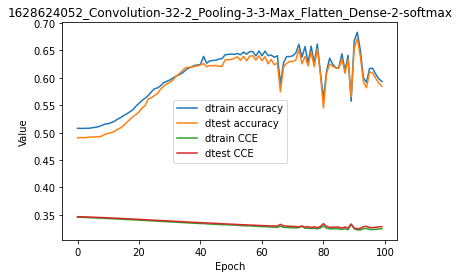

In [15]:
model.plot(path=False)

_